In [1]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from ydata_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot
from matplotlib.gridspec import GridSpec
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from warnings import filterwarnings
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, silhouette_samples
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram
from factor_analyzer import FactorAnalyzer
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.linear_model import ElasticNet
from itertools import combinations
from kmodes.kprototypes import KPrototypes
from collections import Counter
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFE
### so that u dont have warnings
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.cluster import DBSCAN
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

C:\Users\Yehan Perera\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
df = pd.read_csv("Crop_Dataset.csv")

### 1. Data Exploration and Preprocessing

In [4]:
df.head()

N   P   K  temperature   humidity        ph    rainfall  Total_Nutrients  \
0  90  42  43    20.879744  82.002744  6.502985  202.935536              175   
1  85  58  41    21.770462  80.319644  7.038096  226.655537              184   
2  60  55  44    23.004459  82.320763  7.840207  263.964248              159   
3  74  35  40    26.491096  80.158363  6.980401  242.864034              149   
4  78  42  42    20.130175  81.604873  7.628473  262.717340              162   

   Temperature_Humidity  Log_Rainfall  Label  Label_Encoded  
0           1712.196283      5.317804  wheat              0  
1           1748.595734      5.427834  wheat              0  
2           1893.744627      5.579595  wheat              0  
3           2123.482908      5.496611  wheat              0  
4           1642.720357      5.574878  wheat              0

In [5]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall',
       'Total_Nutrients', 'Temperature_Humidity', 'Log_Rainfall', 'Label',
       'Label_Encoded'],
      dtype='object')

In [6]:
df.describe().transpose()
#2200 total records

count         mean         std         min  \
N                     2200.0    50.551818   36.917334    0.000000   
P                     2200.0    53.362727   32.985883    5.000000   
K                     2200.0    48.149091   50.647931    5.000000   
temperature           2200.0    25.616244    5.063749    8.825675   
humidity              2200.0    71.481779   22.263812   14.258040   
ph                    2200.0     6.469480    0.773938    3.504752   
rainfall              2200.0   103.463655   54.958389   20.211267   
Total_Nutrients       2200.0   152.063636   79.918669   17.000000   
Temperature_Humidity  2200.0  1854.231566  699.366334  247.613182   
Log_Rainfall          2200.0     4.508730    0.545400    3.054533   
Label_Encoded         2200.0    10.500000    6.345731    0.000000   

                              25%          50%          75%          max  
N                       21.000000    37.000000    84.250000   140.000000  
P                       28.000000    51.000000    68.000000   145.000000  
K                       20.000000    32.000000    49.000000   205.000000  
temperature             22.769375    25.598693    28.561654    43.675493  
humidity                60.261953    80.473146    89.948771    99.981876  
ph                       5.971693     6.425045     6.923643     9.935091  
rainfall                64.551686    94.867624   124.267508   298.560117  
Total_Nutrients         94.000000   146.000000   179.000000   385.000000  
Temperature_Humidity  1479.558114  1927.883340  2255.752423  4073.159566  
Log_Rainfall             4.182839     4.562968     4.830451     5.702315  
Label_Encoded            5.000000    10.500000    16.000000    21.000000

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   N                     2200 non-null   int64  
 1   P                     2200 non-null   int64  
 2   K                     2200 non-null   int64  
 3   temperature           2200 non-null   float64
 4   humidity              2200 non-null   float64
 5   ph                    2200 non-null   float64
 6   rainfall              2200 non-null   float64
 7   Total_Nutrients       2200 non-null   int64  
 8   Temperature_Humidity  2200 non-null   float64
 9   Log_Rainfall          2200 non-null   float64
 10  Label                 2200 non-null   object 
 11  Label_Encoded         2200 non-null   int64  
dtypes: float64(6), int64(5), object(1)
memory usage: 206.4+ KB


In [9]:
# explicit check for any null values in the dataframe
df.isnull().sum()
#No missing Values

N                       0
P                       0
K                       0
temperature             0
humidity                0
ph                      0
rainfall                0
Total_Nutrients         0
Temperature_Humidity    0
Log_Rainfall            0
Label                   0
Label_Encoded           0
dtype: int64

In [80]:
# Check for duplicates
duplicates = df.duplicated()

# Count the number of duplicates
num_duplicates = duplicates.sum()

# Print the number of duplicate rows
print(f'Number of duplicate rows: {num_duplicates}')
#No duplicates

Number of duplicate rows: 0


In [37]:
#Generating Overall Summary
import pandas as pd
from pandas_profiling import ProfileReport
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [36]:
# Count occurrences of each class in the 'Label_Encoded' column
class_counts = df['Label_Encoded'].value_counts()

# Print the counts for each class
print(class_counts)


Label_Encoded
0     100
1     100
20    100
19    100
18    100
17    100
16    100
15    100
14    100
13    100
12    100
11    100
10    100
9     100
8     100
7     100
6     100
5     100
4     100
3     100
2     100
21    100
Name: count, dtype: int64


### Classes are perfectly Balanced

In [22]:
# Features and Target
x = df.drop(columns=['Label', 'Label_Encoded'])  # Drop non-numeric label
y = df['Label_Encoded']


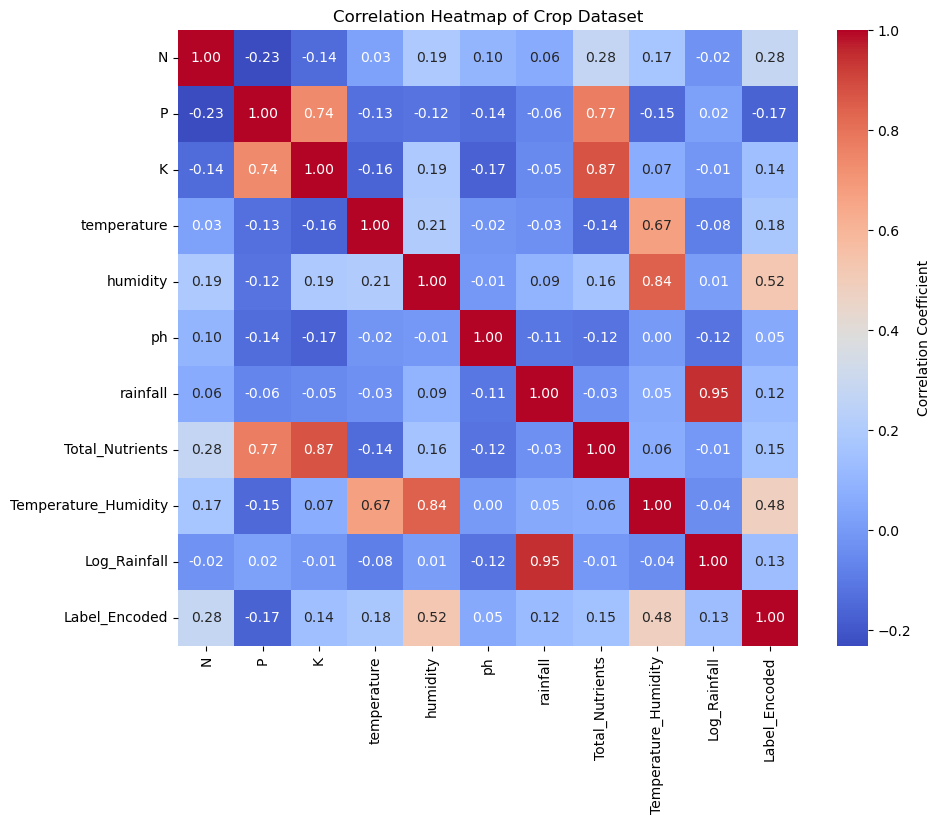

In [45]:
#obtaining Correlation HeatMap
df1 = df.drop(columns=["Label"])
#Calculate the correlation matrix
corr = df1.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'})

# Add labels and title, if desired
plt.title('Correlation Heatmap of Crop Dataset')
plt.show()

#Considerable Correlations between Total_Nutrients with P,K
#Considerable Correlations between Temperature_Humidity with Temperature,Humidity
#Considerable Correlations between P with K
#Considerable Correlations between log_rainfall with Rainfall


In [43]:
# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
x_train
#1760 records in training set

N    P    K  temperature   humidity        ph    rainfall  \
1656   17   16   14    16.396243  92.181519  6.625539  102.944161   
752    37   79   19    27.543848  69.347863  7.143943   69.408782   
892     7   73   25    27.521856  63.132153  7.288057   45.208411   
1041  101   70   48    25.360592  75.031933  6.012697  116.553145   
1179    0   17   30    35.474783  47.972305  6.279134   97.790725   
...   ...  ...  ...          ...        ...       ...         ...   
1638   10    5    5    21.213070  91.353492  7.817846  112.983436   
1095  108   94   47    27.359116  84.546250  6.387431   90.812505   
1130   11   36   31    27.920633  51.779659  6.475449  100.258567   
1294   11  124  204    13.429886  80.066340  6.361141   71.400430   
860    32   78   22    23.970814  62.355576  7.007038   53.409060   

      Total_Nutrients  Temperature_Humidity  Log_Rainfall  
1656               47           1511.430575      4.643854  
752               135           1910.107025      4.254318  
892               105           1737.514007      3.833162  
1041              219           1902.854256      4.766891  
1179               47           1701.807122      4.593004  
...               ...                   ...           ...  
1638               20           1937.887999      4.736053  
1095              249           2313.110686      4.519749  
1130               78           1445.720851      4.617677  
1294              339           1075.281834      4.282212  
860               132           1494.713900      3.996531  

[1760 rows x 10 columns]

In [25]:
#Using IsolationForest to detect outliers(Considering the Whole Dataset)
from sklearn.ensemble import IsolationForest

In [26]:
clf = IsolationForest(contamination=0.1)
clf.fit(x_train)
predictions = clf.predict(x_train)

In [27]:
sum(predictions==1)
#Legal records

1584

In [28]:
sum(predictions==-1)
#Possible Outliers

176

### Clustering

### Kmeans

In [29]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict, cross_val_score,KFold, RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import silhouette_score, silhouette_samples
import seaborn as sns
# Filter out all warnings
warnings.filterwarnings('ignore')


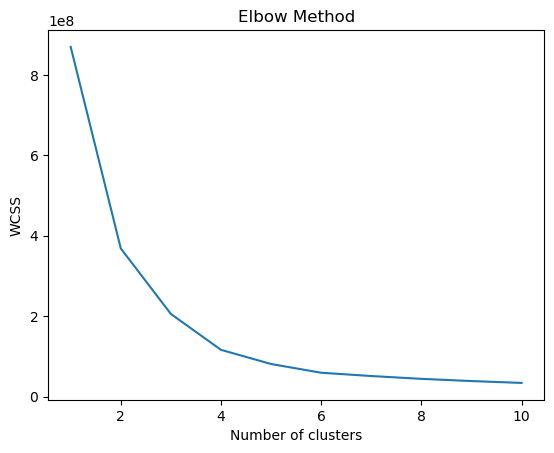

In [30]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x_train)
    wcss.append(kmeans.inertia_)


plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [31]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(x_train)
cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

The average silhouette score is: 0.4985644797967228


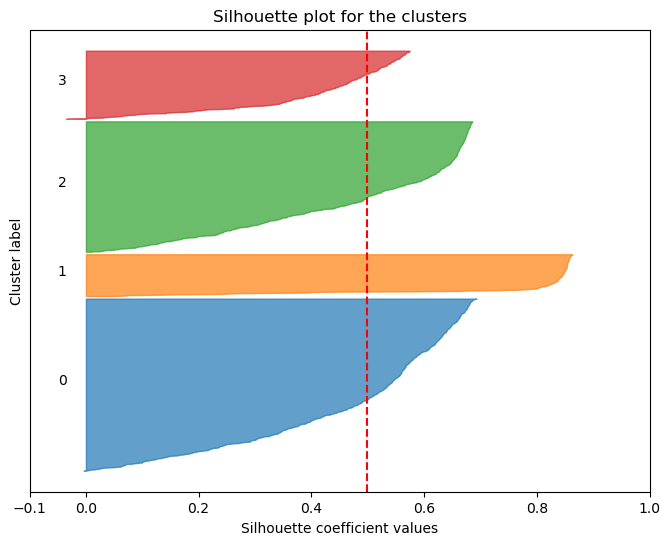

In [32]:
silhouette_avg = silhouette_score(x_train, cluster_labels)
print("The average silhouette score is:", silhouette_avg)


sample_silhouette_values = silhouette_samples(x_train, cluster_labels)


fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(8, 6)


cluster_colors = sns.color_palette('tab10', n_colors=4)

y_lower = 10
for i in range(4):  
    
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cluster_colors[i]
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    
    y_lower = y_upper + 10  

ax1.set_title("Silhouette plot for the clusters")
ax1.set_xlabel("Silhouette coefficient values")
ax1.set_ylabel("Cluster label")


ax1.axvline(x=silhouette_avg, color="red", linestyle="--")


ax1.set_yticks([])
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

In [33]:
# Count the number of observations in each cluster
cluster_counts = np.bincount(cluster_labels)

# Print the number of observations in each cluster
for i, count in enumerate(cluster_counts):
    print(f"Cluster {i}: {count} observations")


Cluster 0: 734 observations
Cluster 1: 179 observations
Cluster 2: 556 observations
Cluster 3: 291 observations


In [35]:
# Initialize a list to store proportions for each class for each cluster
num_classes = 22  # Total number of classes from 0 to 21
proportions = {i: [] for i in range(num_classes)}

# Assuming there are 4 clusters
for cluster_label in range(4):
    # Filter y_train based on the cluster label
    y_train_cluster = y_train[cluster_labels == cluster_label]
    
    # Count the number of occurrences of each class in y_train_cluster
    cluster_class_counts = np.bincount(y_train_cluster, minlength=num_classes)
    
    # Calculate the proportion of each class
    total_samples_cluster = len(y_train_cluster)
    for i in range(num_classes):
        if total_samples_cluster > 0:  # To avoid division by zero
            proportions[i].append(cluster_class_counts[i] / total_samples_cluster)
        else:
            proportions[i].append(0)

# Print proportions for each cluster and each class
for cluster_label in range(4):
    print(f"Cluster {cluster_label}:")
    for class_label in range(num_classes):
        print(f"  Proportion of class {class_label}: {proportions[class_label][cluster_label]:.2f}")


Cluster 0:
  Proportion of class 0: 0.09
  Proportion of class 1: 0.01
  Proportion of class 2: 0.00
  Proportion of class 3: 0.00
  Proportion of class 4: 0.01
  Proportion of class 5: 0.01
  Proportion of class 6: 0.06
  Proportion of class 7: 0.09
  Proportion of class 8: 0.02
  Proportion of class 9: 0.07
  Proportion of class 10: 0.10
  Proportion of class 11: 0.01
  Proportion of class 12: 0.03
  Proportion of class 13: 0.11
  Proportion of class 14: 0.00
  Proportion of class 15: 0.10
  Proportion of class 16: 0.04
  Proportion of class 17: 0.02
  Proportion of class 18: 0.02
  Proportion of class 19: 0.10
  Proportion of class 20: 0.09
  Proportion of class 21: 0.01
Cluster 1:
  Proportion of class 0: 0.00
  Proportion of class 1: 0.00
  Proportion of class 2: 0.41
  Proportion of class 3: 0.45
  Proportion of class 4: 0.06
  Proportion of class 5: 0.00
  Proportion of class 6: 0.00
  Proportion of class 7: 0.00
  Proportion of class 8: 0.00
  Proportion of class 9: 0.00
  Prop

### Model Training

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import DBSCAN, KMeans, HDBSCAN, AffinityPropagation, AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import Binarizer, KBinsDiscretizer
from sklearn.ensemble import VotingClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import FeatureUnion,Pipeline,make_pipeline
from sklearn.base import BaseEstimator , TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelEncoder

### Logistic

In [59]:
### Binary classification 
logreg_classifier = LogisticRegression( solver='liblinear', random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2']  # Regularization type
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=logreg_classifier, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Get the best model from grid search
best_logreg_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_test = best_logreg_model.predict(x_test)

# Evaluate the performance on the test set
accuracy = accuracy_score(y_test, y_pred_test)
classification_report_result = classification_report(y_test, y_pred_test)


# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Print results for Logistic Regression
print(f'Accuracy (Logistic Regression): {accuracy}')
print('Classification Report (Logistic Regression):\n', classification_report_result)
print('Confusion Matrix (Logistic Regression):\n', conf_matrix)


Accuracy (Logistic Regression): 0.9545454545454546
Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.83      0.79      0.81        19
           1       0.95      0.90      0.93        21
           2       1.00      1.00      1.00        26
           3       1.00      1.00      1.00        20
           4       0.95      0.78      0.86        23
           5       0.96      0.96      0.96        24
           6       1.00      0.95      0.97        19
           7       0.90      0.95      0.93        20
           8       0.92      1.00      0.96        11
           9       1.00      0.96      0.98        23
          10       0.95      1.00      0.98        21
          11       1.00      1.00      1.00        19
          12       1.00      1.00      1.00        14
          13       1.00      1.00      1.00        19
          14       1.00      1.00      1.00        17
          15       1.00      1.00     

### RandomForestClassifier

In [68]:
rf_classifier = RandomForestClassifier(random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [ 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Get the best model from grid search
best_rf_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_test = best_rf_model.predict(x_test)

# Evaluate the performance on the test set
accuracy = accuracy_score(y_test, y_pred_test)
classification_report_result = classification_report(y_test, y_pred_test)


report = classification_report(y_test, y_pred_test)
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Make predictions on the training set
y_pred_train = best_rf_model.predict(x_train)

# Evaluate the performance on the training set
accuracy_train = accuracy_score(y_train, y_pred_train)
classification_report_train = classification_report(y_train, y_pred_train)
conf_matrix_train = confusion_matrix(y_train, y_pred_train)

# Print results for RandomForestClassifier on the training set
print(f'Accuracy (Random Forest - Training): {accuracy_train}')
print('Classification Report (Random Forest - Training):\n', classification_report_train)
print('Confusion Matrix (Random Forest - Training):\n', conf_matrix_train)

# Additionally, print results for RandomForestClassifier on the test set
print(f'Accuracy (Random Forest - Test): {accuracy}')
print('Classification Report (Random Forest - Test):\n', classification_report_result)
print('Confusion Matrix (Random Forest - Test):\n', conf_matrix)

Accuracy (Random Forest - Training): 1.0
Classification Report (Random Forest - Training):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        79
           2       1.00      1.00      1.00        74
           3       1.00      1.00      1.00        80
           4       1.00      1.00      1.00        77
           5       1.00      1.00      1.00        76
           6       1.00      1.00      1.00        81
           7       1.00      1.00      1.00        80
           8       1.00      1.00      1.00        89
           9       1.00      1.00      1.00        77
          10       1.00      1.00      1.00        79
          11       1.00      1.00      1.00        81
          12       1.00      1.00      1.00        86
          13       1.00      1.00      1.00        81
          14       1.00      1.00      1.00        83
          15       1.00      1.00      1.00

### SVM Classifier

In [52]:
svm_classifier = SVC(probability=True)

# Define the parameter grid for grid search
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=3, scoring='accuracy',n_jobs=-1)
grid_search.fit(x_train, y_train)

# Get the best model from grid search
best_svm_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_test = best_svm_model.predict(x_test)

# Evaluate the performance on the test set
accuracy = accuracy_score(y_test, y_pred_test)
classification_report_result = classification_report(y_test, y_pred_test)


# Print results for SVM Classifier
print(f'Accuracy (SVM): {accuracy}')
print('Classification Report (SVM):\n', classification_report_result)
print('Confusion Matrix (SVM):\n', conf_matrix)


### KNeighborsClassifier

In [54]:
knn_classifier = KNeighborsClassifier()

# Define the parameter grid for grid search
param_grid = {
    'n_neighbors': [3, 5, 7],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'p': [1, 2]  # Power parameter for Minkowski distance (1 for Manhattan, 2 for Euclidean)
}

# Perform grid search with cross-validation
grid_search_knn = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search_knn.fit(x_train, y_train)

# Get the best model from grid search
best_knn_model = grid_search_knn.best_estimator_

# Make predictions on the test set
y_pred_test_knn = best_knn_model.predict(x_test)

# Evaluate the performance on the test set
accuracy_knn = accuracy_score(y_test, y_pred_test_knn)
classification_report_result_knn = classification_report(y_test, y_pred_test_knn)

# Generate the confusion matrix for KNN
conf_matrix_knn = confusion_matrix(y_test, y_pred_test_knn)

# Print results
print(f'Accuracy (KNN): {accuracy_knn}')
print('Classification Report (KNN):\n', classification_report_result_knn)
print('Confusion Matrix (KNN):\n', conf_matrix_knn)

Accuracy (KNN): 0.9318181818181818
Classification Report (KNN):
               precision    recall  f1-score   support

           0       0.88      0.79      0.83        19
           1       1.00      0.81      0.89        21
           2       1.00      1.00      1.00        26
           3       1.00      1.00      1.00        20
           4       1.00      0.74      0.85        23
           5       0.95      0.83      0.89        24
           6       0.95      0.95      0.95        19
           7       0.76      0.95      0.84        20
           8       0.67      0.91      0.77        11
           9       0.96      1.00      0.98        23
          10       1.00      1.00      1.00        21
          11       0.95      1.00      0.97        19
          12       1.00      0.86      0.92        14
          13       1.00      1.00      1.00        19
          14       1.00      1.00      1.00        17
          15       0.92      1.00      0.96        23
          16    

### XGBoost classifier

In [61]:
xgb_classifier = XGBClassifier()

# Define the parameter grid for grid search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 1]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Get the best model from grid search
best_xgb_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_test = best_xgb_model.predict(x_test)

# Evaluate the performance on the test set
accuracy = accuracy_score(y_test, y_pred_test)
classification_report_result = classification_report(y_test, y_pred_test)



# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Make predictions on the training set
y_pred_train = best_xgb_model.predict(x_train)

# Evaluate the performance on the training set
accuracy_train = accuracy_score(y_train, y_pred_train)
classification_report_train = classification_report(y_train, y_pred_train)
conf_matrix_train = confusion_matrix(y_train, y_pred_train)

# Print results for XGBoost classifier on the training set
print(f'Accuracy (XGBoost  - Training): {accuracy_train}')
print('Classification Report (XGBoost  - Training):\n', classification_report_train)
print('Confusion Matrix (XGBoost  - Training):\n', conf_matrix_train)

# Additionally, print results for XGBoost classifier on the test set
print(f'Accuracy (XGBoost  - Test): {accuracy}')
print('Classification Report (XGBoost  - Test):\n', classification_report_result)
print('Confusion Matrix (XGBoost  - Test):\n', conf_matrix)

Accuracy (XGBoost  - Training): 1.0
Classification Report (XGBoost  - Training):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        79
           2       1.00      1.00      1.00        74
           3       1.00      1.00      1.00        80
           4       1.00      1.00      1.00        77
           5       1.00      1.00      1.00        76
           6       1.00      1.00      1.00        81
           7       1.00      1.00      1.00        80
           8       1.00      1.00      1.00        89
           9       1.00      1.00      1.00        77
          10       1.00      1.00      1.00        79
          11       1.00      1.00      1.00        81
          12       1.00      1.00      1.00        86
          13       1.00      1.00      1.00        81
          14       1.00      1.00      1.00        83
          15       1.00      1.00      1.00        77

### Random forest classifier has the Highest Accuracy

### Applying Feature Importance

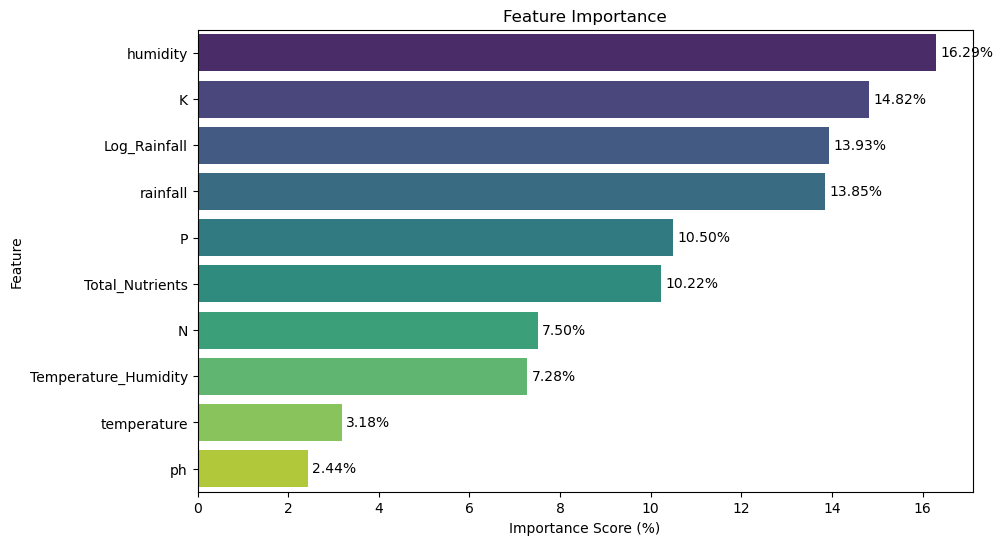

In [69]:

# Assuming feature_importance and x_train are already defined
# Get feature importance (Make sure this matches with your model training code)
feature_importance = best_rf_model.feature_importances_

# Create a DataFrame with feature names and their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': x_train.columns, 
    'Importance': feature_importance
})

# Normalize the importance to sum to 100% for displaying percentages
feature_importance_df['Importance'] = feature_importance_df['Importance'] / feature_importance_df['Importance'].sum() * 100

# Sort the DataFrame by importance score in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance Score (%)')
plt.ylabel('Feature')

# Add annotations to each bar to show the percentage of importance
for p in bar_plot.patches:
    width = p.get_width()    # get the width of each bar
    plt.text(width + 0.1,    # set the text at 0.1 unit right of the bar
             p.get_y() + p.get_height() / 2,  # get Y coordinate + height / 2
             '{:1.2f}%'.format(width),       # format string to 2 decimal place
             va='center')  # vertically center align the text

plt.show()


### Removing least important variables and Fitting RF

### Removing ph

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the RandomForest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 3, 5, 7],  # None means no limit on the depth
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(x_train.drop(columns=['ph']), y_train)

# Get the best model from grid search
best_rf_model1 = grid_search.best_estimator_

# Make predictions on the test set
y_pred_test = best_rf_model1.predict(x_test.drop(columns=['ph']))

# Evaluate the performance on the test set
accuracy = accuracy_score(y_test, y_pred_test)
classification_report_result = classification_report(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Make predictions on the training set
y_pred_train = best_rf_model1.predict(x_train.drop(columns=['ph']))
conf_matrix_train = confusion_matrix(y_train, y_pred_train)

# Print the classification report for the test set
print(classification_report_result)
print(f'Accuracy (Random Forest - Test): {accuracy}')

              precision    recall  f1-score   support

           0       1.00      0.84      0.91        19
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        26
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        23
           5       1.00      0.96      0.98        24
           6       1.00      1.00      1.00        19
           7       1.00      1.00      1.00        20
           8       0.92      1.00      0.96        11
           9       1.00      1.00      1.00        23
          10       1.00      1.00      1.00        21
          11       1.00      1.00      1.00        19
          12       1.00      1.00      1.00        14
          13       1.00      1.00      1.00        19
          14       1.00      1.00      1.00        17
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00        14
          17       1.00    

In [67]:
### Accuracy does not change when ph is being dropped!!

### Removing ph and temperature

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the RandomForest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 3, 5, 7],  # None means no limit on the depth
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(x_train.drop(columns=['ph',"temperature"]), y_train)

# Get the best model from grid search
best_rf_model2 = grid_search.best_estimator_

# Make predictions on the test set
y_pred_test = best_rf_model2.predict(x_test.drop(columns=['ph',"temperature"]))

# Evaluate the performance on the test set
accuracy = accuracy_score(y_test, y_pred_test)
classification_report_result = classification_report(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Make predictions on the training set
y_pred_train = best_rf_model2.predict(x_train.drop(columns=['ph',"temperature"]))
conf_matrix_train = confusion_matrix(y_train, y_pred_train)

# Print the classification report for the test set
print(classification_report_result)
print(f'Accuracy (Random Forest - Test): {accuracy}')

              precision    recall  f1-score   support

           0       0.94      0.79      0.86        19
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        26
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        23
           5       1.00      0.96      0.98        24
           6       1.00      1.00      1.00        19
           7       1.00      1.00      1.00        20
           8       0.92      1.00      0.96        11
           9       1.00      1.00      1.00        23
          10       1.00      1.00      1.00        21
          11       1.00      1.00      1.00        19
          12       1.00      1.00      1.00        14
          13       1.00      1.00      1.00        19
          14       1.00      1.00      1.00        17
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00        14
          17       1.00    

In [66]:
### When both ph and temperature are being dropped the accuracy is reduced!!

### Applying RFE

In [72]:
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

# Initialize RFE with 10 features
rfe = RFE(estimator=best_rf_model, n_features_to_select=10)

# Fit RFE to the training data
rfe.fit(x_train, y_train)

# Get the selected features
selected_features = x_train.columns[rfe.support_]

# Train XGBoost model with selected features
best_rf_model_rfe = best_rf_model.fit(x_train[selected_features], y_train)

# Make predictions on the test set using the model with selected features
y_pred_test_rfe = best_rf_model_rfe.predict(x_test[selected_features])

# Calculate accuracy
accuracy_rfe = accuracy_score(y_test, y_pred_test_rfe)

# Print the accuracy
print("Accuracy of XGBoost model with RFE (10 features):", accuracy_rfe)


Accuracy of XGBoost model with RFE (10 features): 0.990909090909091


In [77]:
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

# Initialize RFE with 9 features
rfe = RFE(estimator=best_rf_model, n_features_to_select=9)

# Fit RFE to the training data
rfe.fit(x_train, y_train)

# Get the selected features
selected_features = x_train.columns[rfe.support_]

# Train RandomForest model with selected features
best_rf_model_rfe1 = best_rf_model.fit(x_train[selected_features], y_train)

# Make predictions on the test set using the model with selected features
y_pred_test_rfe = best_rf_model_rfe1.predict(x_test[selected_features])

# Calculate accuracy
accuracy_rfe = accuracy_score(y_test, y_pred_test_rfe)

# Print the accuracy
print("Accuracy of RandomForest model with RFE (9 features):", accuracy_rfe)


Accuracy of RandomForest model with RFE (9 features): 0.9931818181818182


### Accuracy is increased

In [76]:
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

# Initialize RFE with 8 features
rfe = RFE(estimator=best_rf_model, n_features_to_select=8)

# Fit RFE to the training data
rfe.fit(x_train, y_train)

# Get the selected features
selected_features = x_train.columns[rfe.support_]

# Train the RandomForest model with selected features
best_rf_model_rfe2 = best_rf_model.fit(x_train[selected_features], y_train)

# Make predictions on the test set using the model with selected features
y_pred_test_rfe = best_rf_model_rfe2.predict(x_test[selected_features])

# Calculate accuracy
accuracy_rfe = accuracy_score(y_test, y_pred_test_rfe)

# Print the accuracy
print("Accuracy of RandomForest model with RFE (8 features):", accuracy_rfe)


Accuracy of RandomForest model with RFE (8 features): 0.9886363636363636


In [78]:
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

# Initialize RFE with 7 features
rfe = RFE(estimator=best_rf_model, n_features_to_select=7)

# Fit RFE to the training data
rfe.fit(x_train, y_train)

# Get the selected features
selected_features = x_train.columns[rfe.support_]

# Train the RandomForest model with selected features
best_rf_model_rfe3 = best_rf_model.fit(x_train[selected_features], y_train)

# Make predictions on the test set using the model with selected features
y_pred_test_rfe = best_rf_model_rfe3.predict(x_test[selected_features])

# Calculate accuracy
accuracy_rfe = accuracy_score(y_test, y_pred_test_rfe)

# Print the accuracy
print("Accuracy of RandomForest model with RFE (7 features):", accuracy_rfe)


Accuracy of RandomForest model with RFE (7 features): 0.9818181818181818


In [79]:
### When reducing more features accuracy decreases

### PCA

In [81]:
# Assuming X is your data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [82]:
# Initialize PCA and reduce the dimensions
pca = PCA(n_components=0.95)  # Keeps 95% of the variance
X_pca = pca.fit_transform(X_scaled)

# Check how many components were kept
print(f'Number of components after PCA: {pca.n_components_}')


Number of components after PCA: 6


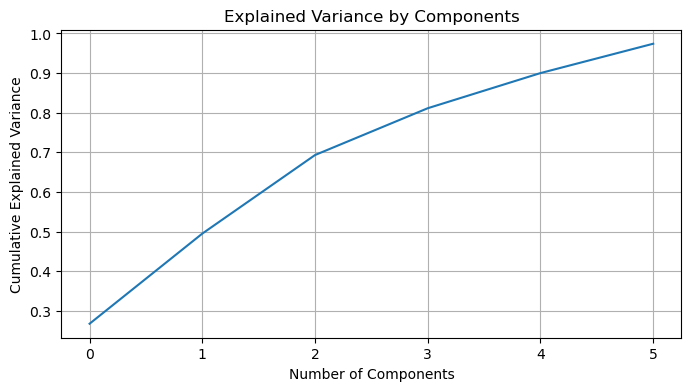

In [83]:
# Plot the explained variance
plt.figure(figsize=(8, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.grid(True)
plt.show()


In [84]:
# X_pca can be used as inputs for machine learning models
print(X_pca)


[[-0.04085351  0.15052558  2.39698228 -1.41162805 -0.1622312   0.38639139]
 [ 0.12183086  0.1821616   2.70388006 -1.49775892  0.63844809  0.01521026]
 [-0.26756958  0.31599793  3.17273856 -1.26776647  1.95167648  0.01705694]
 ...
 [-0.39182384  0.08066837  1.78787659 -1.70850381 -0.80331501 -0.56710781]
 [-0.44359849 -0.42434297  0.68906074 -1.73271845 -0.53553795 -1.19524145]
 [-0.84897844 -0.4746561   1.04677087 -1.66112461 -0.3803699  -0.39131394]]


### Fitting models Using PCA data

In [88]:
from sklearn.model_selection import train_test_split

# Assuming y is your target array
x_train, x_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)


### Random Forest Classifier

In [89]:
rf_classifier = RandomForestClassifier(random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [ 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Get the best model from grid search
best_rf_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_test = best_rf_model.predict(x_test)

# Evaluate the performance on the test set
accuracy = accuracy_score(y_test, y_pred_test)
classification_report_result = classification_report(y_test, y_pred_test)


report = classification_report(y_test, y_pred_test)
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Make predictions on the training set
y_pred_train = best_rf_model.predict(x_train)

# Evaluate the performance on the training set
accuracy_train = accuracy_score(y_train, y_pred_train)
classification_report_train = classification_report(y_train, y_pred_train)
conf_matrix_train = confusion_matrix(y_train, y_pred_train)

# Print results for RandomForestClassifier on the training set
print(f'Accuracy (Random Forest - Training): {accuracy_train}')
print('Classification Report (Random Forest - Training):\n', classification_report_train)
print('Confusion Matrix (Random Forest - Training):\n', conf_matrix_train)

# Additionally, print results for RandomForestClassifier on the test set
print(f'Accuracy (Random Forest - Test): {accuracy}')
print('Classification Report (Random Forest - Test):\n', classification_report_result)
print('Confusion Matrix (Random Forest - Test):\n', conf_matrix)

Accuracy (Random Forest - Training): 1.0
Classification Report (Random Forest - Training):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        79
           2       1.00      1.00      1.00        74
           3       1.00      1.00      1.00        80
           4       1.00      1.00      1.00        77
           5       1.00      1.00      1.00        76
           6       1.00      1.00      1.00        81
           7       1.00      1.00      1.00        80
           8       1.00      1.00      1.00        89
           9       1.00      1.00      1.00        77
          10       1.00      1.00      1.00        79
          11       1.00      1.00      1.00        81
          12       1.00      1.00      1.00        86
          13       1.00      1.00      1.00        81
          14       1.00      1.00      1.00        83
          15       1.00      1.00      1.00

### XGBoost Classifier

In [90]:
xgb_classifier = XGBClassifier()

# Define the parameter grid for grid search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 1]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Get the best model from grid search
best_xgb_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_test = best_xgb_model.predict(x_test)

# Evaluate the performance on the test set
accuracy = accuracy_score(y_test, y_pred_test)
classification_report_result = classification_report(y_test, y_pred_test)



# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Make predictions on the training set
y_pred_train = best_xgb_model.predict(x_train)

# Evaluate the performance on the training set
accuracy_train = accuracy_score(y_train, y_pred_train)
classification_report_train = classification_report(y_train, y_pred_train)
conf_matrix_train = confusion_matrix(y_train, y_pred_train)

# Print results for XGBoost classifier on the training set
print(f'Accuracy (XGBoost  - Training): {accuracy_train}')
print('Classification Report (XGBoost  - Training):\n', classification_report_train)
print('Confusion Matrix (XGBoost  - Training):\n', conf_matrix_train)

# Additionally, print results for XGBoost classifier on the test set
print(f'Accuracy (XGBoost  - Test): {accuracy}')
print('Classification Report (XGBoost  - Test):\n', classification_report_result)
print('Confusion Matrix (XGBoost  - Test):\n', conf_matrix)

Accuracy (XGBoost  - Training): 1.0
Classification Report (XGBoost  - Training):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        79
           2       1.00      1.00      1.00        74
           3       1.00      1.00      1.00        80
           4       1.00      1.00      1.00        77
           5       1.00      1.00      1.00        76
           6       1.00      1.00      1.00        81
           7       1.00      1.00      1.00        80
           8       1.00      1.00      1.00        89
           9       1.00      1.00      1.00        77
          10       1.00      1.00      1.00        79
          11       1.00      1.00      1.00        81
          12       1.00      1.00      1.00        86
          13       1.00      1.00      1.00        81
          14       1.00      1.00      1.00        83
          15       1.00      1.00      1.00        77

### Accuracies are less than previous approaches

### Joblib Model Creaton and Predicton

In [92]:
import joblib

# Save the model as a .joblib file
joblib_path = "best_rf_model_rfe1.joblib"
joblib.dump(best_rf_model_rfe1, joblib_path)

print(f"Model saved to {joblib_path}")



Model saved to best_rf_model_rfe1.joblib
